In [7]:
### Exercise 3.31 part 1
import numpy as np
import pandas as pd

def cmdscale(D):
    # Number of points
    n = len(D)

    # Centering matrix
    H = np.eye(n) - np.ones((n,n))/n

    # YY^T
    B = -H.dot(D**2).dot(H)/2

    # Diagonalize
    evals, evecs = np.linalg.eigh(B)

    # Sort by eigenvalue in descending order
    idx = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]

    # Compute the coordinates using positve-eigenvalued components only
    w, = np.where(evals > 0)
    L = np.diag(np.sqrt(evals[w]))
    V = evecs[:,w]
    Y = V.dot(L)
    return Y, evals

def label_points(x,y,val,ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

In [8]:
df = pd.read_csv('citydista.csv')
cities = df.iloc[:,0]
df = df.drop(df.columns[0], axis=1)
df = df.to_numpy()

Y, evals = cmdscale(df)

data = Y[:,:2]
df = pd.DataFrame(data=Y[:,:2],columns=["x","y"])
df = df.join(cities)
df.columns = ['x','y','city']
df['x'] = df['x'] * -1

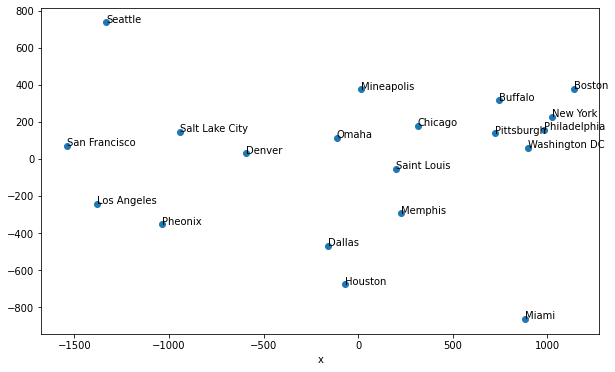

In [9]:
ax = df.set_index('x')['y'].plot(style='o',figsize=(10,6))
label_points(df.x,df.y,df.city,ax)

In [ ]:
### Exercise 3.31 part 2
### To construct a 3-D world model, we can print the first 3 dimensions (columns) of the X matrix returned from
### our algorithm. Similar to how we constructed a 2-D map here, we can construct a 3-D model with the 50 cities given,
### just working with the first 3 columns instead of just 2 as in part 1.